## Exercises week 2

# Working with textual data

### 0. Get the data.

- Download  `articles.tar.gz` or `articles.zip` from Canvas (under `Week 2`). Please note that this is not the full dataset, but random sample of the data described [here](https://dx.doi.org/10.7910/DVN/ULHLCB).


<div class="alert-danger">
<p>Alternatively, you can also download <code>articles.tar.gz</code> from
<a href="https://dx.doi.org/10.7910/DVN/ULHLCB">https://dx.doi.org/10.7910/DVN/ULHLCB</a> to get <strong>all</strong> the data. Please note that this is a very large dataset, and for practice purposes, you do not need everything. </p>
</div>



- Unpack it. On Linux and MacOS, you can do this with `tar -xzf mydata.tar.gz` on the command line. On Windows, you may need an additional tool such as `7zip` for that (note that technically speaking, there is a `tar` archive within a `gz` archive, so unpacking may take *two* steps depending on your tool).


### 1. Inspect the structure of the dataset.
What information do the following elements give you?

- folder (directory) names
- folder structure/hierarchy
- file names
- file contents

### 2. Discuss strategies for working with this dataset!

- Which questions could you answer?
- How could you deal with it, given the size and the structure?

### 3. Read some (or all?) data

Here is some example code that you can modify. you could, for instance, do the following to read a *part* of your dataset.

In [21]:
from glob import glob
import random
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

#specify the path to your unpacked articles.
PATH = 'path/to/articles'

In [51]:
newspaperfiles = glob(PATH+'/*/Vox/*')
documents = []
for filename in newspaperfiles:
    with open(filename) as f:
        documents.append(f.read())

In [52]:
len(documents)

2000

<div class="alert-info">
<ul>
<li>Can you explain what the <code>glob</code> function does?</li>
<li>What does <code>documents</code> contain? First make an educated guess based on the code snippet, then check it! Do <em>not</em> print the whole thing, but use <code>len()</code>, <code>type()</code> en slicing (e.g.,<code>[:10]</code>) to get the info you need.</li>
</ul>
</div>


<br>
<div class="alert-block alert-warning">
<p>Tip: take a random sample of the articles for practice purposes (if your code works, you can scale up!)</p><code>articles =random.sample(documents, 10)</code></p>
</div>

### 4. Perform some analyses!

- Perform some first analyses on the data using string methods and regular expressions!

Techniques you can try out include:

a.  lowercasing

b.  tokenization

c.  stopword removal

d.  stemming and/or lemmatizing

In [24]:
articles =random.sample(documents, 10)

    #a. lowercasing articles

In [25]:
articles_lower_cased = [art.lower() for art in articles]

    #b. tokenization

In [26]:
#b. tokenization: basic
articles_split = [art.split() for art in articles]

#. tokenization: more advanced
articles_tokenized = [TreebankWordTokenizer().tokenize(art) for art in articles ]

    #c. Stopword removal

In [27]:
# mystopwords = stopwords.words("english")
mystopwords = stopwords.words("english")

In [28]:
mystopwords.extend(["add", "more", "words"]) # manually add more stopwords to your list if needed
print(mystopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
#Now, remove stopwords from the corpus:
    
articles_without_stopwords = []
for article in articles:
    articles_no_stop = ""
    for word in article.lower().split():
        if word not in mystopwords:
            articles_no_stop = articles_no_stop + " " + word
    articles_without_stopwords.append(articles_no_stop)

In [30]:
# same as the cell above, this time with list comprehension
articles_without_stopwords = [" ".join([w for w in article.lower().split() if w not in mystopwords]) for article in articles]


<br>
<div class="alert-block alert-warning">
It's good practice to frequently inspect the results of your code, to make sure you are not making mistakes, and the results make sense. For example, compare your results to some random articles from the original sample:

In [31]:
print(articles[8][:100])
print("-----------------")
print("".join(articles_without_stopwords[8])[:100])

On a bitterly cold day in late January, I knocked on the door of a home in Louisville, Kentuckys Cam
-----------------
bitterly cold day late january, knocked door home louisville, kentuckys camp taylor neighborhood. ru


    #4. Stemming

In [32]:
stemmer = SnowballStemmer("english")

stemmed_text = []
for article in articles:
    stemmed_words = ""
    for word in article.lower().split():
        stemmed_words = stemmed_words + " " + stemmer.stem(word)
    stemmed_text.append(stemmed_words.strip())

In [ ]:
# same as the cell above, this time with list comprehension

In [33]:
stemmed_text  = [" ".join([stemmer.stem(w) for w in article.lower().split()]) for article in articles]

## 5. Vectorize the data and create a word cloud

<div class="alert-info">
<ul>
<p>a. Think about different ways to vectorize the data. You can use <code>count</code> and / or <code>tfidf</code><br>b. Also consider different parameter settings of the vectorizers. For example, apply pruning or not.</p>

In [119]:
# initialize the vectorizer
vec = CountVectorizer()
# fit and transform the documents
vec_fit = vec.fit_transform(articles_without_stopwords)
vec_fit.shape

(10, 2479)

In [121]:
vec.get_feature_names()

['000',
 '10',
 '100',
 '103',
 '11',
 '12',
 '13',
 '130',
 '14',
 '14th',
 '15',
 '150',
 '17',
 '18',
 '19',
 '1955',
 '1965',
 '1990',
 '1993',
 '20',
 '2004',
 '2010',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020',
 '21',
 '22',
 '23',
 '26',
 '27',
 '29',
 '31',
 '32',
 '32nd',
 '33',
 '35',
 '35th',
 '38',
 '45',
 '50',
 '50s',
 '52',
 '53',
 '54',
 '554',
 '56th',
 '77',
 '83',
 '85',
 '9th',
 'abandon',
 'abandoning',
 'aberration',
 'able',
 'abnormally',
 'abruptly',
 'absolutely',
 'abuse',
 'abuses',
 'accepted',
 'accepting',
 'accident',
 'accommodate',
 'according',
 'accordingly',
 'account',
 'accountable',
 'accounts',
 'accused',
 'accusing',
 'acknowledge',
 'across',
 'act',
 'acting',
 'action',
 'actions',
 'activist',
 'activists',
 'actual',
 'actually',
 'adam',
 'adapt',
 'added',
 'adding',
 'additional',
 'addressed',
 'addressing',
 'adds',
 'adjust',
 'administration',
 'administrations',
 'admission',
 'admitted',
 'admonishing',
 'adopt

In [123]:
# transform the data from sparse to dense: do not do this with a very large dataset. 
feature_names = vec.get_feature_names()
dense = vec_fit.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.T.sum(axis=1)

000        5
10         4
100        1
103        1
11         1
          ..
youll      1
young      3
younger    1
youre      1
zero       1
Length: 2479, dtype: int64

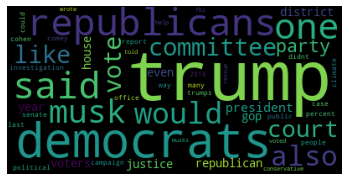

In [127]:
Cloud = WordCloud(background_color="black", max_words=50).generate_from_frequencies(df.T.sum(axis=1))

plt.imshow(Cloud)
plt.axis("off")
plt.show()

<div class="alert-info">
<ul>
<ul>
<p>a. Do the results change if you use <code>tfidf</code> transformation?<br>b. What happens if you use different pre-processing decisions? How does that affect the final word cloud?<br>c. What happens if include all the data?</p>
</ul>
<ul>